# HW7 Problem 7 Implementation

Mattie studies algebraic geometry at Rainbow University. One day she woke up and forgot the volume of the sphere. Instead of scouring the internet for the answer, she decided to estimate it herself using Monte-Carlo Simulation. She's familiar with 3 different coordinate systems-- rectangular, cylindrical, and spherical coordinates and plans to generate this simulation and verify her findings with all three methods to make sure that she gets the right answer. 

However, it doesn't look like all three methods are correct. It's your job to find out which one is correct. Draw graphs plotting the estimated volume against the number of samples up to 10000. Do you get different answers for all three? Can you give an intuition or proof why one is correct whereas the others are wrong? Can you analyze the differences between the three?

(a) Using randomly generated spherical coordinates: Uniformly at random choose a value for $\theta$, $\phi$, and $r$. Plot the values of your Monte Carlo Simulation.
(b) Using randomly generated rectangular coordinates: Uniformly at random choose a value for $x$, $y$, and $z$. Plot the values of your Monte Carlo Simulation.
(c) Using randomly generated cylindrical coordinates: Uniformly at random choose a value for $\theta$, $r$, and $h$. Plot the values of your Monte Carlo Simulation.

Let the radius of the sphere be $R=1$. If correctly computed, the simulation should goes to $4/3 \pi \approx 4.1888$.

**Method (a)**:

We have $x=rsin\phi cos\theta$, $y=rsin\phi sin\theta$, $z=rcos\phi$. (relationship of spherical & rectangular coordinates)

We generate $\theta$ uniformly random from $[0, 2\pi]$, $\phi$ uniformly random from $[0, \pi]$. And generate $r$ uniformly random from $[0, R]$. We can expect this method **won't be correct**,since the volume will be proportional to $r^3$, and we need generate $r^3$ uniformly random from $[0, R^3]$.

```
r = R * np.cbrt(np.random.uniform(0, 1))
```
**Method (b)**: I expect this to be the correct method.


**Method (c)**: Cylindrical Coordinates

We have $x=r cos\theta$, $y=r sin\theta$, $z=h$. (relationship of cylindrical & rectangular coordinates)

We generate $\theta$ uniformly random from $[0, 2\pi]$, $h$ uniformly random from $[0, R]$. And generate $r$ uniformly random from $[0, R]$. We can expect this method **won't be correct**,since the volume will be proportional to $r^2*h$, and we need generate $r^2$ uniformly random from $[0, R^2]$.

We now give our implementation of method (b) and (c) as below:

Note that method (a) is skipped since the points will always be inside the sphere. In this case, I am confused and don't know how the monte carlo simulation should be implemented.

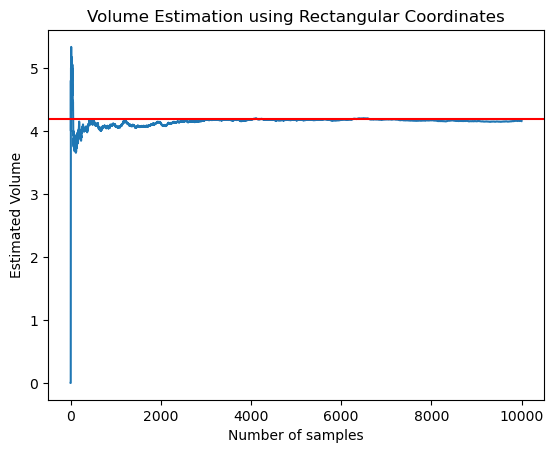

In [1]:
# Implementation of method b:
import numpy as np
import matplotlib.pyplot as plt

# Sphere radius
R = 1
# Number of samples
N = 10000
# Array to store volumes
volumes = []
# Counter for points inside the sphere
inside_sphere = 0

for i in range(1, N + 1):
    # Random rectangular coordinates within [-R, R] -- cubic
    x = np.random.uniform(-R, R)
    y = np.random.uniform(-R, R)
    z = np.random.uniform(-R, R)
    
    # Check if point is inside the sphere
    if x**2 + y**2 + z**2 <= R**2:
        inside_sphere += 1

    # Volume estimation (we know the volume of cubic)
    volume = (inside_sphere / i) * (2*R)**3
    volumes.append(volume)

# Plotting
plt.plot(range(1, N + 1), volumes)
plt.axhline(y=(4/3)*np.pi*R**3, color='r', linestyle='-')
plt.title('Volume Estimation using Rectangular Coordinates')
plt.xlabel('Number of samples')
plt.ylabel('Estimated Volume')
plt.show()

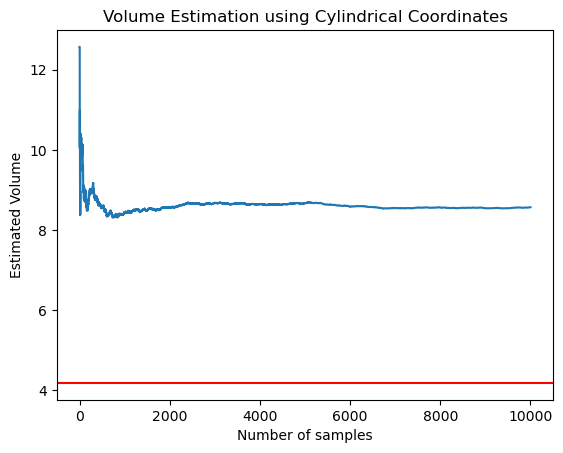

In [2]:
# Implementation of method (c)

# Reset counter for points inside the sphere
inside_sphere = 0
# Array to store volumes
volumes = []

for i in range(1, N + 1):
    # Random cylindrical coordinates
    theta = np.random.uniform(0, 2 * np.pi)
    r = R * np.sqrt(np.random.uniform(0, 1))
    h = np.random.uniform(-R, R)
    
    # Check if point is inside the sphere
    if r**2 + h**2 <= R**2:
        inside_sphere += 1

    # Volume estimation
    volume = (inside_sphere / i) * (2 * np.pi * R**2 * 2 * R)
    volumes.append(volume)

# Plotting
plt.plot(range(1, N + 1), volumes)
plt.axhline(y=(4/3)*np.pi*R**3, color='r', linestyle='-')
plt.title('Volume Estimation using Cylindrical Coordinates')
plt.xlabel('Number of samples')
plt.ylabel('Estimated Volume')
plt.show()